# Clustering KLSE Stocks

Analysis Goal:
Each stocks listed in KLSE main market display different patterns in their historical daily prices. Using historical prices of the stocks crawled from 1st January 2017 until 2nd April 2019, cluster them into groups so that a profitable investment stratergy can be build.

For this assignment, we are investigating the comovement of stocks from KLSI index. We need some features so that we could assess the covariance and comovement between the stocks. First, I use feature selection to select variable to compare between the stocks. I use adjusted price as my variable by calculating open price + close price / 2.

In [1]:
# dataframe
import pandas as pd

Add stocks data from database

In [2]:
# all stock prices data
all_stocks = pd.read_csv("stocks.csv")
# Check the dataframe
all_stocks.shape

(357, 779)

In [3]:
# Check the data
all_stocks

Date   0002.KL   0008.KL  0021.KL  0029.KL   0037.KL  0041.KL  \
0    2017-01-02  1.068875  0.744214    0.900    0.165  0.274187    0.295   
1    2017-01-03  1.020728  0.744214    0.875    0.165  0.274187    0.290   
2    2017-01-04  1.039986  0.744214    0.890    0.165  0.283979    0.285   
3    2017-01-05  1.039986  0.744214    0.895    0.165  0.288875    0.285   
4    2017-01-06  1.039986  0.744214    0.905    0.160  0.288875    0.285   
5    2017-01-09  1.030357  0.759000    0.915    0.155  0.288875    0.285   
6    2017-01-10  1.039986  0.768857    0.915    0.155  0.279083    0.285   
7    2017-01-11  1.039986  0.759000    0.905    0.160  0.298668    0.280   
8    2017-01-12  1.039986  0.754071    0.920    0.165  0.303564    0.280   
9    2017-01-13  1.039986  0.754071    0.885    0.170  0.303564    0.280   
10   2017-01-16  1.039986  0.768857    0.915    0.160  0.298668    0.280   
11   2017-01-17  1.039986  0.768857    0.905    0.160  0.303564    0.280   
12   2017-01-18  1.020728  0.759000    0.890    0.160  0.298668    0.280   
13   2017-01-19  1.039986  0.754071    0.885    0.155  0.293771    0.285   
14   2017-01-20  1.030357  0.744214    0.885    0.160  0.288875    0.285   
15   2017-01-23  1.030357  0.754071    0.880    0.165  0.283979    0.290   
16   2017-01-24  1.030357  0.759000    0.900    0.160  0.279083    0.285   
17   2017-01-25  1.011098  0.763929    0.925    0.160  0.279083    0.285   
18   2017-01-26  1.011098  0.763929    0.920    0.160  0.283979    0.285   
19   2017-01-27  1.011098  0.763929    0.930    0.165  0.283979    0.285   
20   2017-01-31  1.011098  0.763929    0.935    0.160  0.298668    0.285   
21   2017-02-02  1.011098  0.778714    0.940    0.165  0.313356    0.285   
22   2017-02-03  1.107393  0.773786    0.930    0.160  0.318252    0.285   
23   2017-02-06  1.107393  0.778714    0.940    0.175  0.318252    0.290   
24   2017-02-07  1.107393  0.778714    0.930    0.165  0.313356    0.305   
25   2017-02-08  1.107393  0.783643    0.940    0.165  0.328045    0.305   
26   2017-02-10  1.434796  0.803357    0.925    0.170  0.342733    0.290   
27   2017-02-13  1.338501  0.823071    0.915    0.185  0.342733    0.290   
28   2017-02-14  1.251836  0.808286    0.905    0.175  0.337837    0.295   
29   2017-02-15  1.328872  0.813214    0.935    0.180  0.328045    0.295   
..          ...       ...       ...      ...      ...       ...      ...   
327  2018-04-18       NaN       NaN      NaN      NaN       NaN    0.250   
328  2018-04-19       NaN       NaN      NaN      NaN       NaN    0.270   
329  2018-04-20       NaN       NaN      NaN      NaN       NaN    0.265   
330  2018-04-23       NaN       NaN      NaN      NaN       NaN    0.275   
331  2018-04-24       NaN       NaN      NaN      NaN       NaN    0.265   
332  2018-04-25       NaN       NaN      NaN      NaN       NaN    0.255   
333  2018-04-26       NaN       NaN      NaN      NaN       NaN    0.250   
334  2018-04-27       NaN       NaN      NaN      NaN       NaN    0.250   
335  2018-04-30       NaN       NaN      NaN      NaN       NaN    0.245   
336  2018-05-02       NaN       NaN      NaN      NaN       NaN    0.245   
337  2018-05-03       NaN       NaN      NaN      NaN       NaN    0.245   
338  2018-05-04       NaN       NaN      NaN      NaN       NaN    0.245   
339  2018-05-07       NaN       NaN      NaN      NaN       NaN    0.245   
340  2019-02-22       NaN       NaN      NaN      NaN       NaN      NaN   
341  2019-03-07       NaN       NaN      NaN      NaN       NaN      NaN   
342  2019-03-13       NaN       NaN      NaN      NaN       NaN      NaN   
343  2019-03-14       NaN       NaN      NaN      NaN       NaN      NaN   
344  2019-03-15       NaN       NaN      NaN      NaN       NaN      NaN   
345  2019-03-18       NaN       NaN      NaN      NaN       NaN      NaN   
346  2019-03-19       NaN       NaN      NaN      NaN       NaN      NaN   
347  2019-03-20       NaN       NaN      NaN      NaN      

In [4]:
# Check the null values in data frame
all_stocks.isnull().sum()

Date         0
0002.KL    106
0008.KL     88
0021.KL     89
0029.KL     87
0037.KL     86
0041.KL     17
0043.KL    103
0049.KL     87
0051.KL     87
0054.KL     86
0056.KL     17
0058.KL     17
0059.KL     17
0064.KL     17
0065.KL     17
0078.KL     17
0082.KL     17
0083.KL     17
0090.KL     17
0091.KL     17
0097.KL     17
0099.KL     17
0101.KL     17
0113.KL     17
0118.KL     17
0128.KL     17
0136.KL     16
0138.KL     17
0143.KL     17
          ... 
9385.KL     88
9393.KL     87
9407.KL     90
9423.KL     85
9431.KL    356
9466.KL     87
9474.KL     87
9539.KL     88
9571.KL     87
9598.KL    104
9601.KL     88
9628.KL    356
9679.KL     86
9687.KL     93
9695.KL    356
9717.KL     87
9741.KL     91
9776.KL     87
9792.KL     87
9806.KL     17
9814.KL     90
9822.KL     87
9865.KL     94
9873.KL     89
9881.KL     86
9938.KL     18
9946.KL     85
9954.KL     97
9962.KL     87
9997.KL     88
Length: 779, dtype: int64

In [8]:
all_stocks['1023.KL'].isnull().sum()

88

In [7]:
clean_df = all_stocks[all_stocks['Date'] < '2017-12-31']
clean_df.isnull().sum()

Date         0
0002.KL     22
0008.KL      4
0021.KL      6
0029.KL      4
0037.KL      3
0041.KL      1
0043.KL     21
0049.KL      4
0051.KL      4
0054.KL      3
0056.KL      1
0058.KL      1
0059.KL      1
0064.KL      1
0065.KL      1
0078.KL      1
0082.KL      1
0083.KL      1
0090.KL      1
0091.KL      1
0097.KL      1
0099.KL      1
0101.KL      1
0113.KL      1
0118.KL      1
0128.KL      1
0136.KL      0
0138.KL      1
0143.KL      1
          ... 
9385.KL      5
9393.KL      4
9407.KL      6
9423.KL      2
9431.KL    253
9466.KL      4
9474.KL      4
9539.KL      4
9571.KL      4
9598.KL     21
9601.KL      4
9628.KL    253
9679.KL      2
9687.KL     10
9695.KL    253
9717.KL      4
9741.KL      8
9776.KL      3
9792.KL      3
9806.KL      1
9814.KL      6
9822.KL      4
9865.KL      9
9873.KL      5
9881.KL      4
9938.KL      1
9946.KL      2
9954.KL     14
9962.KL      3
9997.KL      5
Length: 779, dtype: int64

In [9]:
all_stocks['1023.KL'].isnull().sum()

88

In [10]:
# Drop stocks that have a lot of missing prices
all_stocks.drop([col for col, val in all_stocks.iteritems() if val.isnull().sum() >90], axis=1, inplace=True)
all_stocks.shape

(357, 660)

In [11]:
clean_df = all_stocks[all_stocks['Date'] < '2017-12-31']
clean_df.isnull().sum()

Date       0
0008.KL    4
0021.KL    6
0029.KL    4
0037.KL    3
0041.KL    1
0049.KL    4
0051.KL    4
0054.KL    3
0056.KL    1
0058.KL    1
0059.KL    1
0064.KL    1
0065.KL    1
0078.KL    1
0082.KL    1
0083.KL    1
0090.KL    1
0091.KL    1
0097.KL    1
0099.KL    1
0101.KL    1
0113.KL    1
0118.KL    1
0128.KL    1
0136.KL    0
0138.KL    1
0143.KL    1
0149.KL    1
0151.KL    1
          ..
9237.KL    3
9261.KL    5
9288.KL    4
9296.KL    3
9318.KL    4
9326.KL    4
9334.KL    4
9342.KL    1
9385.KL    5
9393.KL    4
9407.KL    6
9423.KL    2
9466.KL    4
9474.KL    4
9539.KL    4
9571.KL    4
9601.KL    4
9679.KL    2
9717.KL    4
9776.KL    3
9792.KL    3
9806.KL    1
9814.KL    6
9822.KL    4
9873.KL    5
9881.KL    4
9938.KL    1
9946.KL    2
9962.KL    3
9997.KL    5
Length: 660, dtype: int64

In [14]:
clean_df['1023.KL'].isnull().sum()

4

In [15]:
# NA at index 168
df1 = clean_df.drop(clean_df.index[168])
df1.isnull().sum()

Date       0
0008.KL    3
0021.KL    5
0029.KL    3
0037.KL    2
0041.KL    0
0049.KL    3
0051.KL    3
0054.KL    2
0056.KL    0
0058.KL    0
0059.KL    0
0064.KL    0
0065.KL    0
0078.KL    0
0082.KL    0
0083.KL    0
0090.KL    0
0091.KL    0
0097.KL    0
0099.KL    0
0101.KL    0
0113.KL    0
0118.KL    0
0128.KL    0
0136.KL    0
0138.KL    0
0143.KL    0
0149.KL    0
0151.KL    0
          ..
9237.KL    3
9261.KL    4
9288.KL    3
9296.KL    2
9318.KL    4
9326.KL    3
9334.KL    3
9342.KL    0
9385.KL    4
9393.KL    3
9407.KL    6
9423.KL    1
9466.KL    3
9474.KL    3
9539.KL    4
9571.KL    3
9601.KL    3
9679.KL    1
9717.KL    3
9776.KL    3
9792.KL    2
9806.KL    0
9814.KL    6
9822.KL    3
9873.KL    4
9881.KL    3
9938.KL    0
9946.KL    1
9962.KL    2
9997.KL    4
Length: 660, dtype: int64

In [16]:
df1 = df1.fillna(df1.mean())
df1.isnull().sum()
list(df1)

['Date',
 '0008.KL',
 '0021.KL',
 '0029.KL',
 '0037.KL',
 '0041.KL',
 '0049.KL',
 '0051.KL',
 '0054.KL',
 '0056.KL',
 '0058.KL',
 '0059.KL',
 '0064.KL',
 '0065.KL',
 '0078.KL',
 '0082.KL',
 '0083.KL',
 '0090.KL',
 '0091.KL',
 '0097.KL',
 '0099.KL',
 '0101.KL',
 '0113.KL',
 '0118.KL',
 '0128.KL',
 '0136.KL',
 '0138.KL',
 '0143.KL',
 '0149.KL',
 '0151.KL',
 '0159.KL',
 '0166.KL',
 '0168.KL',
 '0172.KL',
 '0183.KL',
 '0185.KL',
 '0186.KL',
 '1007.KL',
 '1015.KL',
 '1023.KL',
 '1058.KL',
 '1066.KL',
 '1082.KL',
 '1155.KL',
 '1163.KL',
 '1171.KL',
 '1198.KL',
 '1201.KL',
 '1287.KL',
 '1295.KL',
 '1503.KL',
 '1538.KL',
 '1562.KL',
 '1589.KL',
 '1619.KL',
 '1643.KL',
 '1651.KL',
 '1694.KL',
 '1724.KL',
 '1818.KL',
 '1899.KL',
 '1902.KL',
 '1929.KL',
 '1961.KL',
 '1996.KL',
 '2054.KL',
 '2062.KL',
 '2089.KL',
 '2097.KL',
 '2127.KL',
 '2135.KL',
 '2143.KL',
 '2186.KL',
 '2216.KL',
 '2224.KL',
 '2259.KL',
 '2283.KL',
 '2291.KL',
 '2429.KL',
 '2445.KL',
 '2488.KL',
 '2542.KL',
 '2569.KL',
 '2577.

In [17]:
# Set Date as the index to make the dataframe a time series and drop the Date
df2 = df1.set_index(pd.to_datetime(df1['Date']), inplace=False, drop=True)
df2.dtypes
df2 = df2.drop("Date", axis=1)
df2.shape

(252, 659)

In [18]:
df2.head()

0008.KL  0021.KL  0029.KL   0037.KL  0041.KL  0049.KL  0051.KL  \
Date                                                                          
2017-01-02  0.744214    0.900    0.165  0.274187    0.295    0.395    0.110   
2017-01-03  0.744214    0.875    0.165  0.274187    0.290    0.400    0.115   
2017-01-04  0.744214    0.890    0.165  0.283979    0.285    0.410    0.110   
2017-01-05  0.744214    0.895    0.165  0.288875    0.285    0.410    0.120   
2017-01-06  0.744214    0.905    0.160  0.288875    0.285    0.405    0.115   

             0054.KL  0056.KL   0058.KL   ...     9792.KL  9806.KL  9814.KL  \
Date                                      ...                                 
2017-01-02  0.177962    0.180  1.681421   ...     0.67083    0.480     0.61   
2017-01-03  0.182906    0.180  1.691311   ...     0.69417    0.480     0.61   
2017-01-04  0.182906    0.185  1.701202   ...     0.69417    0.495     0.59   
2017-01-05  0.187849    0.185  1.720984   ...     0.70000    0.485     0.60   
2017-01-06  0.187849    0.180  1.720984   ...     0.69417    0.480     0.60   

             9822.KL   9873.KL  9881.KL  9938.KL   9946.KL  9962.KL  9997.KL  
Date                                                                          
2017-01-02  4.838720  0.833953    0.400    0.260  0.362124    0.385     0.62  
2017-01-03  4.996719  0.857917    0.420    0.264  0.362124    0.385     0.61  
2017-01-04  5.036219  0.929810    0.420    0.264  0.362124    0.385     0.62  
2017-01-05  5.332468  0.953774    0.425    0.260  0.362124    0.380     0.65  
2017-01-06  5.589215  0.996909    0.430    0.272  0.362124    0.380     0.65  

[5 rows x 659 columns]

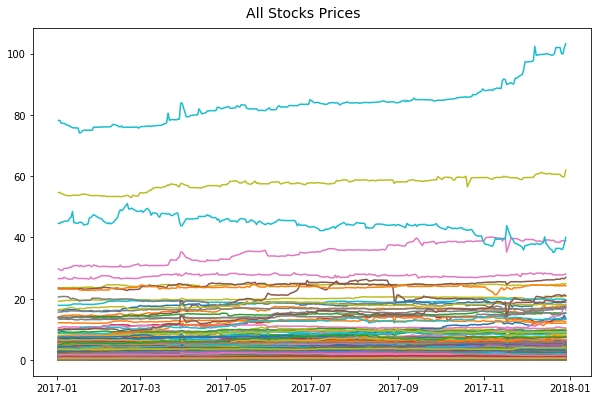

In [20]:
# plotting
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

f, ax = plt.subplots(figsize=(10, 6))
ax.plot(df2)
f.subplots_adjust(top=0.93)
t= f.suptitle('All Stocks Prices', fontsize=14)


In [21]:
# SAX transformation
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.piecewise import SymbolicAggregateApproximation

SAX_stock = pd.DataFrame()
n_sax_symbols = 20
n_paa_segments = 20
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  # Rescale time series

for stock in df2:
    dataset = scaler.fit_transform(df2[stock])
    # print df2[stock]
    sax = SymbolicAggregateApproximation(n_segments=n_paa_segments, alphabet_size_avg=n_sax_symbols)
    sax_dataset_inv = sax.inverse_transform(sax.fit_transform(dataset))
    SAX_stock[stock] = sax_dataset_inv[0].ravel()
    
SAX_stock.shape

(252, 659)

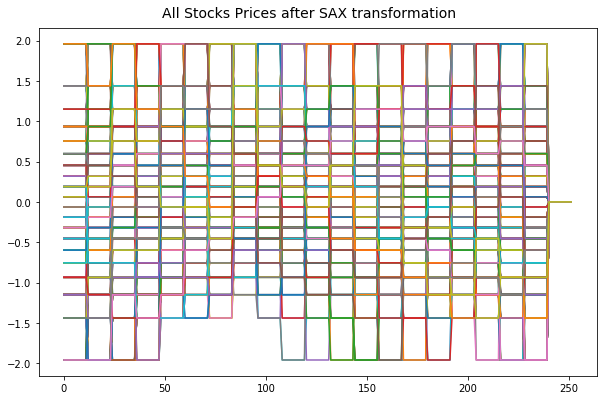

In [22]:
f, ax = plt.subplots(figsize=(10, 6))
ax.plot(SAX_stock)
f.subplots_adjust(top=0.93)
t= f.suptitle('All Stocks Prices after SAX transformation', fontsize=14)

In [23]:
# function to plot correlation matrix in form of heatmap
def plot_corr(df, size=10):
    import matplotlib.pyplot as plt
    # Compute the correlation matrix for the received dataframe
    corr = df.corr()
    # Plot the correlation matrix
    fig, ax = plt.subplots(figsize=(size, size))
    cax = ax.matshow(corr, cmap='RdYlGn')
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90);
    plt.yticks(range(len(corr.columns)), corr.columns);
    # Add the colorbar legend
    cbar = fig.colorbar(cax, ticks=[-1, 0, 1], aspect=40, shrink=.8)

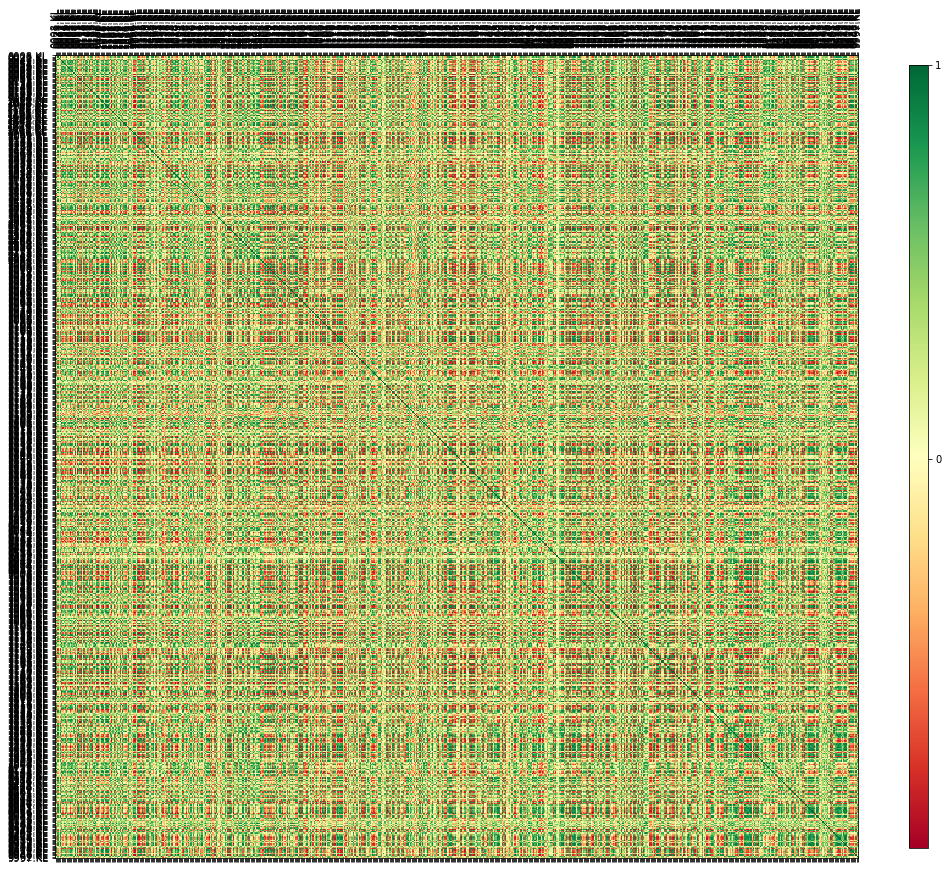

In [24]:
# Plot correlation matrix of stocks after transformation
plot_corr(SAX_stock, size=18)

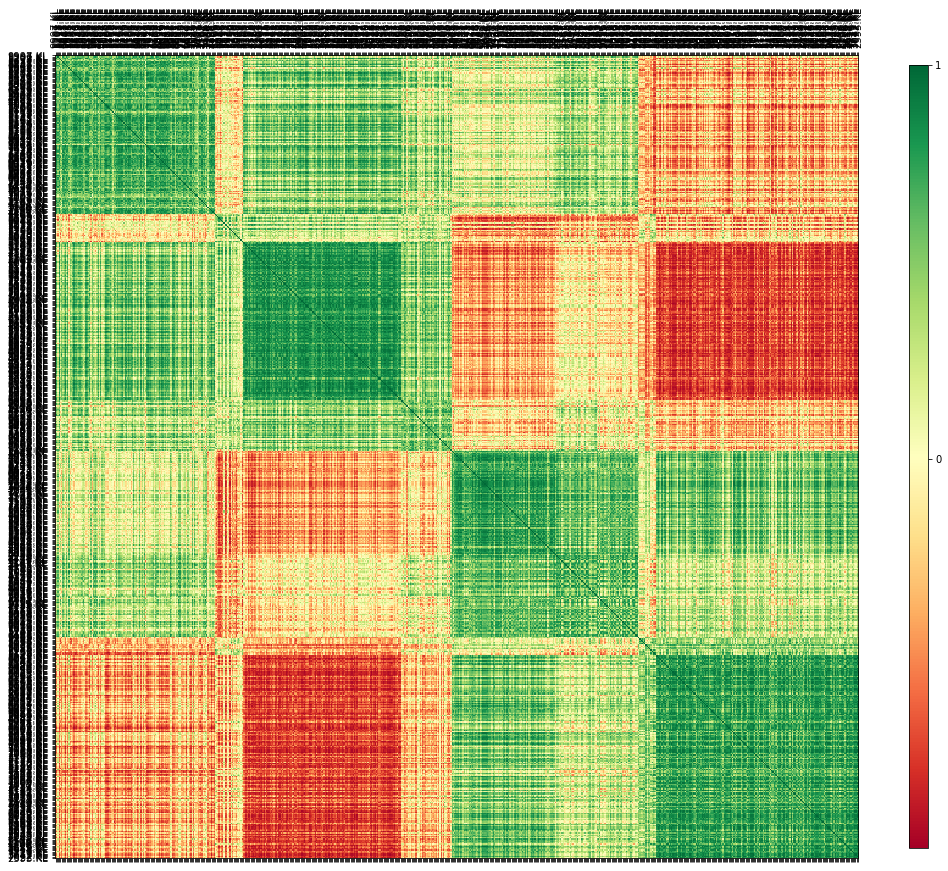

In [25]:
# cluster according to heatmap using hierarchical clustering algorithm
import scipy
import scipy.cluster.hierarchy as sch

X = SAX_stock.corr().values
d = sch.distance.pdist(X)   # vector of ('55' choose 2) pairwise distances
L = sch.linkage(d, method='complete')
ind = sch.fcluster(L, 0.5*d.max(), 'distance')
columns = [SAX_stock.columns.tolist()[i] for i in list((np.argsort(ind)))]
cluster_SAX = SAX_stock.reindex(columns, axis=1)

# print the stocks after clustered according to the correlation
plot_corr(cluster_SAX, size=18)

/Users/mhafizhussin/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:37: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.


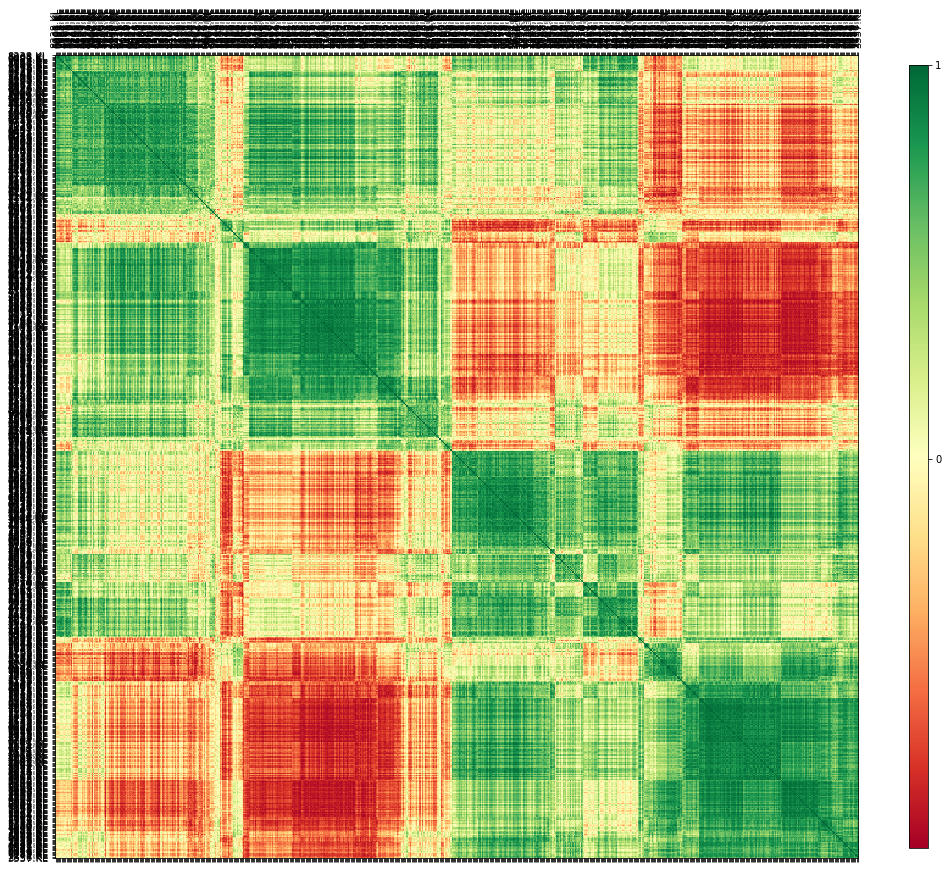

In [26]:
# SORT
# Two pass clustering
# 1-We cluster the corr matrix
#   We sort the stock data according to this clustering
# 2-For cluster bigger than a threshold we cluster those sub-clusters
#   We sort the stock data according to these clustering

cluster_th = 4

X = SAX_stock.corr().values
d = sch.distance.pdist(X)
L = sch.linkage(d, method='complete')
ind = sch.fcluster(L, 0.5*d.max(), 'distance')

columns = [SAX_stock.columns.tolist()[i] for i in list(np.argsort(ind))]
df = SAX_stock.reindex(columns, axis=1)

unique, counts = np.unique(ind, return_counts=True)
counts = dict(zip(unique, counts))

i = 0
j = 0
columns = []
for cluster_l1 in set(sorted(ind)):
    j += counts[cluster_l1]
    sub = df[df.columns.values[i:j]]
    if counts[cluster_l1]>cluster_th:
        X = sub.corr().values
        d = sch.distance.pdist(X)
        L = sch.linkage(d, method='complete')
        ind = sch.fcluster(L, 0.5*d.max(), 'distance')
        col = [sub.columns.tolist()[i] for i in list((np.argsort(ind)))]
        sub = sub.reindex(col, axis=1)
    cols = sub.columns.tolist()
    columns.extend(cols)
    i = j
df = df.reindex_axis(columns, axis=1)

plot_corr(df, 18)

Now, we group the stocks into 3 big clusters

In [27]:
# find cimb
list(df)

['8338.KL',
 '5908.KL',
 '6491.KL',
 '0083.KL',
 '7073.KL',
 '7085.KL',
 '5024.KL',
 '4197.KL',
 '7107.KL',
 '5268.KL',
 '6378.KL',
 '7226.KL',
 '7773.KL',
 '5227.KL',
 '0183.KL',
 '7248.KL',
 '7245.KL',
 '3298.KL',
 '8605.KL',
 '5195.KL',
 '7243.KL',
 '5200.KL',
 '6521.KL',
 '8133.KL',
 '2682.KL',
 '9393.KL',
 '8877.KL',
 '5136.KL',
 '7239.KL',
 '9962.KL',
 '2852.KL',
 '1066.KL',
 '7202.KL',
 '5649.KL',
 '5283.KL',
 '6874.KL',
 '5754.KL',
 '2488.KL',
 '1929.KL',
 '5209.KL',
 '7609.KL',
 '7212.KL',
 '7246.KL',
 '7191.KL',
 '7374.KL',
 '7803.KL',
 '7676.KL',
 '0099.KL',
 '8397.KL',
 '1198.KL',
 '7471.KL',
 '8478.KL',
 '7237.KL',
 '9776.KL',
 '6742.KL',
 '8311.KL',
 '7036.KL',
 '7076.KL',
 '7126.KL',
 '7139.KL',
 '8494.KL',
 '8931.KL',
 '9407.KL',
 '9423.KL',
 '9571.KL',
 '0041.KL',
 '6718.KL',
 '0029.KL',
 '8966.KL',
 '9679.KL',
 '7201.KL',
 '6084.KL',
 '5100.KL',
 '5078.KL',
 '5056.KL',
 '6645.KL',
 '3247.KL',
 '4596.KL',
 '2283.KL',
 '2291.KL',
 '5106.KL',
 '2577.KL',
 '5436.KL',
 '53

In [28]:
# Group the clusters into a single dataframe
Cluster_1 = df.loc[:, '5211.KL':'7203.KL']

In [31]:
# Group the clusters into a single dataframe
# Cluster_1 = df.loc[:, '5166.KL':'7230.KL']
Cluster_2 = df.loc[:, '7199.KL':'7253.KL']
Cluster_3 = df.loc[:, '7232.KL':'7209.KL']

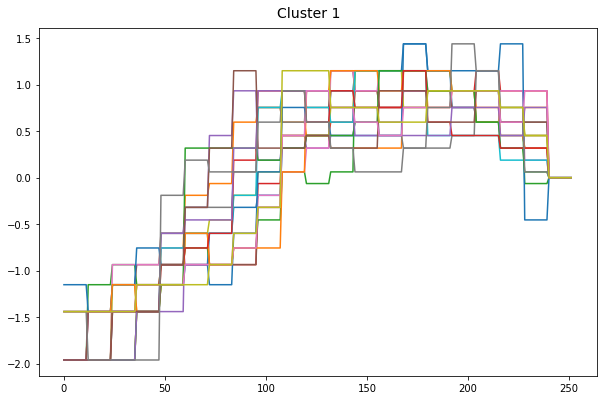

In [29]:
f, ax = plt.subplots(figsize=(10, 6))
ax.plot(Cluster_1)
f.subplots_adjust(top=0.93)
t= f.suptitle('Cluster 1', fontsize=14)

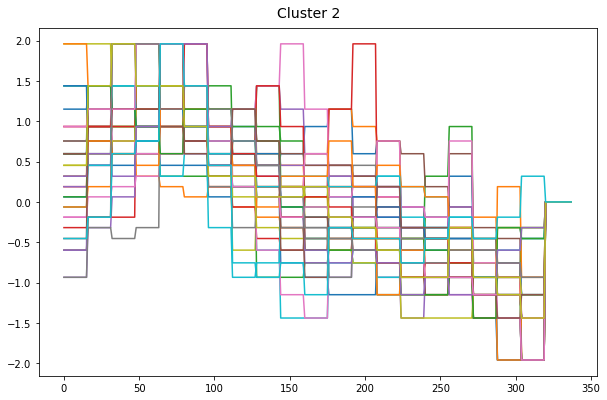

In [33]:
f, ax = plt.subplots(figsize=(10, 6))
ax.plot(Cluster_2)
f.subplots_adjust(top=0.93)
t= f.suptitle('Cluster 2', fontsize=14)

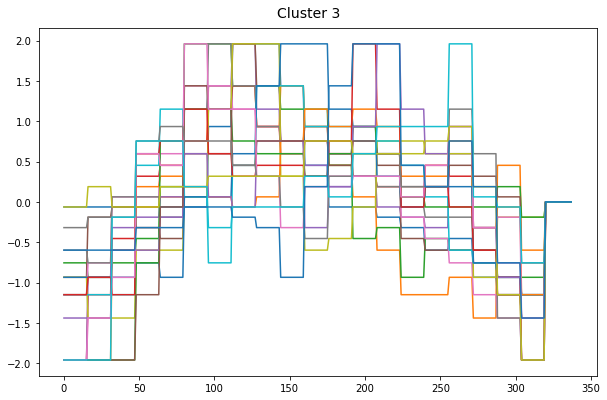

In [34]:
f, ax = plt.subplots(figsize=(10, 6))
ax.plot(Cluster_3)
f.subplots_adjust(top=0.93)
t= f.suptitle('Cluster 3', fontsize=14)

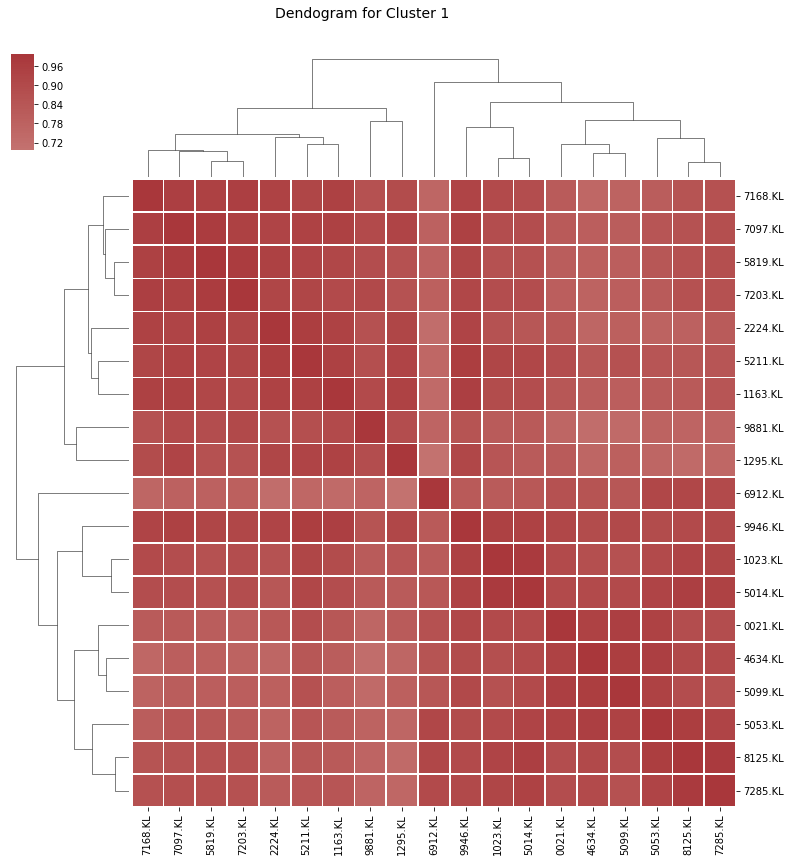

In [30]:
# Draw the dendeogram for further clustering -- Cluster 1
X = Cluster_1.corr().values
d = sch.distance.pdist(X)   
L = sch.linkage(d, method='complete')
ind = sch.fcluster(L, 0.5*d.max(), 'distance')
columns = [Cluster_1.columns.tolist()[i] for i in list((np.argsort(ind)))]
cluster1_1 = Cluster_1.reindex(columns, axis=1)

pp = sns.clustermap(cluster1_1.corr(), center=0, cmap="vlag",
               linewidths=.75, figsize=(13, 13))
fig = pp.fig
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Dendogram for Cluster 1', fontsize=14)


In [31]:
#save dataframe
Cluster_1

5211.KL   5053.KL   1295.KL   7097.KL   5099.KL   7168.KL   1163.KL  \
0   -1.439531 -1.959964 -1.959964 -1.959964 -1.959964 -1.959964 -1.959964   
1   -1.439531 -1.959964 -1.959964 -1.959964 -1.959964 -1.959964 -1.959964   
2   -1.439531 -1.959964 -1.959964 -1.959964 -1.959964 -1.959964 -1.959964   
3   -1.439531 -1.959964 -1.959964 -1.959964 -1.959964 -1.959964 -1.959964   
4   -1.439531 -1.959964 -1.959964 -1.959964 -1.959964 -1.959964 -1.959964   
5   -1.439531 -1.959964 -1.959964 -1.959964 -1.959964 -1.959964 -1.959964   
6   -1.439531 -1.959964 -1.959964 -1.959964 -1.959964 -1.959964 -1.959964   
7   -1.439531 -1.959964 -1.959964 -1.959964 -1.959964 -1.959964 -1.959964   
8   -1.439531 -1.959964 -1.959964 -1.959964 -1.959964 -1.959964 -1.959964   
9   -1.439531 -1.959964 -1.959964 -1.959964 -1.959964 -1.959964 -1.959964   
10  -1.439531 -1.959964 -1.959964 -1.959964 -1.959964 -1.959964 -1.959964   
11  -1.439531 -1.959964 -1.959964 -1.959964 -1.959964 -1.959964 -1.959964   
12  -1.439531 -1.959964 -1.150349 -1.439531 -1.439531 -1.439531 -1.959964   
13  -1.439531 -1.959964 -1.150349 -1.439531 -1.439531 -1.439531 -1.959964   
14  -1.439531 -1.959964 -1.150349 -1.439531 -1.439531 -1.439531 -1.959964   
15  -1.439531 -1.959964 -1.150349 -1.439531 -1.439531 -1.439531 -1.959964   
16  -1.439531 -1.959964 -1.150349 -1.439531 -1.439531 -1.439531 -1.959964   
17  -1.439531 -1.959964 -1.150349 -1.439531 -1.439531 -1.439531 -1.959964   
18  -1.439531 -1.959964 -1.150349 -1.439531 -1.439531 -1.439531 -1.959964   
19  -1.439531 -1.959964 -1.150349 -1.439531 -1.439531 -1.439531 -1.959964   
20  -1.439531 -1.959964 -1.150349 -1.439531 -1.439531 -1.439531 -1.959964   
21  -1.439531 -1.959964 -1.150349 -1.439531 -1.439531 -1.439531 -1.959964   
22  -1.439531 -1.959964 -1.150349 -1.439531 -1.439531 -1.439531 -1.959964   
23  -1.439531 -1.959964 -1.150349 -1.439531 -1.439531 -1.439531 -1.959964   
24  -1.439531 -1.959964 -0.934589 -1.439531 -1.439531 -1.150349 -0.934589   
25  -1.439531 -1.959964 -0.934589 -1.439531 -1.439531 -1.150349 -0.934589   
26  -1.439531 -1.959964 -0.934589 -1.439531 -1.439531 -1.150349 -0.934589   
27  -1.439531 -1.959964 -0.934589 -1.439531 -1.439531 -1.150349 -0.934589   
28  -1.439531 -1.959964 -0.934589 -1.439531 -1.439531 -1.150349 -0.934589   
29  -1.439531 -1.959964 -0.934589 -1.439531 -1.439531 -1.150349 -0.934589   
..        ...       ...       ...       ...       ...       ...       ...   
222  0.453762  0.597760  0.597760  0.934589  0.318639  0.597760  0.934589   
223  0.453762  0.597760  0.597760  0.934589  0.318639  0.597760  0.934589   
224  0.453762  0.597760  0.597760  0.934589  0.318639  0.597760  0.934589   
225  0.453762  0.597760  0.597760  0.934589  0.318639  0.597760  0.934589   
226  0.453762  0.597760  0.597760  0.934589  0.318639  0.597760  0.934589   
227  0.453762  0.597760  0.597760  0.934589  0.318639  0.597760  0.934589   
228  0.318639  0.755415 -0.062707  0.934589  0.318639  0.453762  0.189118   
229  0.318639  0.755415 -0.062707  0.934589  0.318639  0.453762  0.189118   
230  0.318639  0.755415 -0.062707  0.934589  0.318639  0.453762  0.189118   
231  0.318639  0.755415 -0.062707  0.934589  0.318639  0.453762  0.189118   
232  0.318639  0.755415 -0.062707  0.934589  0.318639  0.453762  0.189118   
233  0.318639  0.755415 -0.062707  0.934589  0.318639  0.453762  0.189118   
234  0.318639  0.755415 -0.062707  0.934589  0.318639  0.453762  0.189118   
235  0.318639  0.755415 -0.062707  0.934589  0.318639  0.453762  0.189118   
236  0.318639  0.755415 -0.062707  0.934589  0.318639  0.453762  0.189118   
237  0.318639  0.755415 -0.062707  0.934589  0.318639  0.453762  0.189118   
238  0.318639  0.755415 -0.062707  0.934589  0.318639  0.453762  0.189118   
239  0.318639  0.755415 -0.062707  0.934589  0.318639  0.453762  0.189118   
240  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
241  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
24

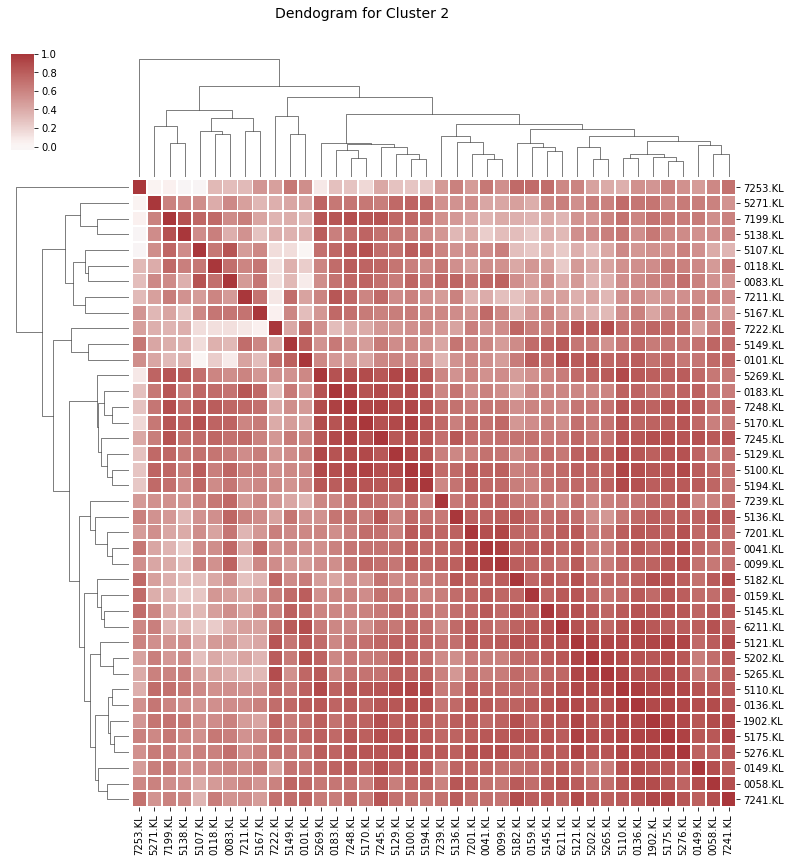

In [43]:
# Draw the dendeogram for further clustering -- Cluster 2
X = Cluster_2.corr().values
d = sch.distance.pdist(X)   
L = sch.linkage(d, method='complete')
ind = sch.fcluster(L, 0.5*d.max(), 'distance')
columns = [Cluster_2.columns.tolist()[i] for i in list((np.argsort(ind)))]
cluster2_2 = Cluster_2.reindex(columns, axis=1)

pp = sns.clustermap(cluster2_2.corr(), center=0, cmap="vlag",
               linewidths=.75, figsize=(13, 13))
fig = pp.fig
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Dendogram for Cluster 2', fontsize=14)

In [ ]:
# save kan cluster1
Cluster

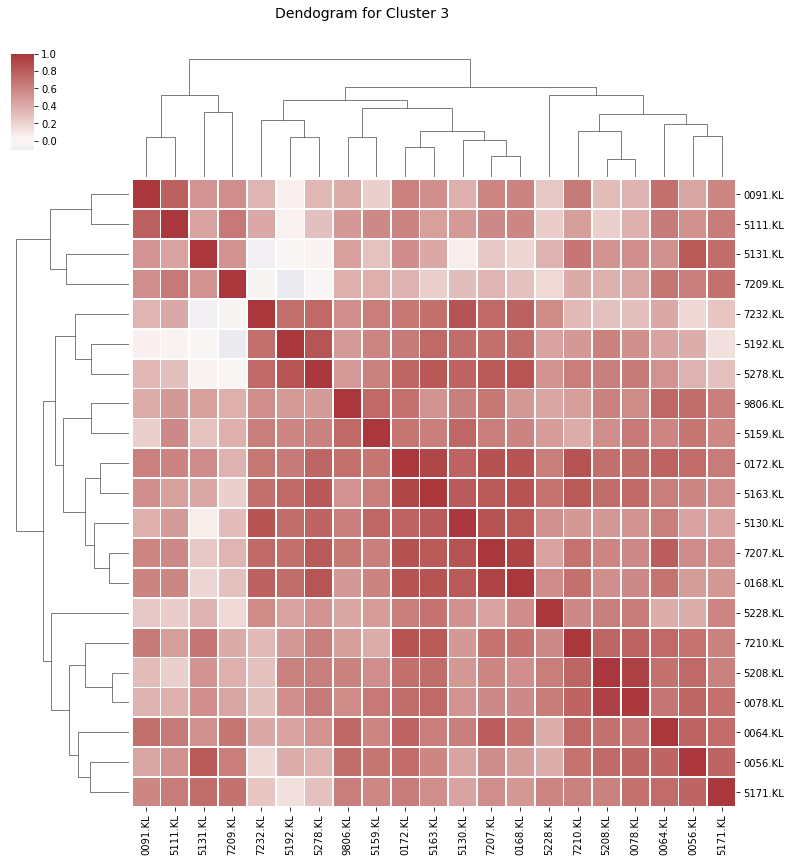

In [44]:
# Draw the dendeogram for further clustering -- Cluster 3
X = Cluster_3.corr().values
d = sch.distance.pdist(X)   
L = sch.linkage(d, method='complete')
ind = sch.fcluster(L, 0.5*d.max(), 'distance')
columns = [Cluster_3.columns.tolist()[i] for i in list((np.argsort(ind)))]
cluster3_3 = Cluster_3.reindex(columns, axis=1)

pp = sns.clustermap(cluster3_3.corr(), center=0, cmap="vlag",
               linewidths=.75, figsize=(13, 13))
fig = pp.fig
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Dendogram for Cluster 3', fontsize=14)

In [51]:
# Let see the actual time series in a sub-cluster
# 0091, 5111, 5131,7209
sub_cluster_1 = df2.loc[:, ['0091.KL','5111.KL','5131.KL','7209.KL']]
# sub_cluster_1

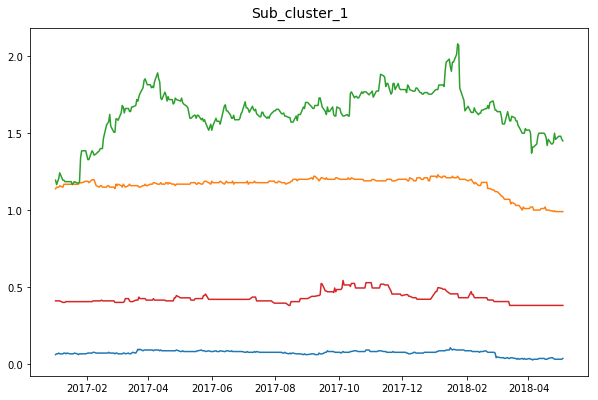

In [52]:
f, ax = plt.subplots(figsize=(10, 6))
ax.plot(sub_cluster_1)
f.subplots_adjust(top=0.93)
t= f.suptitle('Sub_cluster_1', fontsize=14)